## Simple Neural Network

It is a simple classfication problem using HR Data.  The target variable is 'left'

In [87]:
import pandas as pd
import numpy as np


In [88]:
## Reading the data
df = pd.read_csv("F:/Python Learning/Imarticus/Dataset/hr_data.csv")

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [90]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [91]:
## Checking the target variable
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Neural networks will accept only numerical data.  Hence we will convert all categorical data into a numerical data using get_dummeis function

In [92]:
feats = ['department','salary']
df_final = pd.get_dummies(df,columns=feats,drop_first=True)

In [93]:
df_final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [94]:
## Creating Independent and dependent variables
X = df_final.drop(['left'],axis=1).values
y = df_final['left'].values

In [95]:
## Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [96]:
## Scalling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
X_train.shape

(11249, 18)

### Building the Neural Network

In [98]:
## Let us import the required libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

In [99]:
classifier = Sequential()

In [100]:
classifier.add(Dense(18, kernel_initializer = "uniform",activation = "relu", input_dim=18))
classifier.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))

In [101]:
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))

In [102]:
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [103]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 18)                342       
                                                                 
 dense_5 (Dense)             (None, 9)                 171       
                                                                 
 dense_6 (Dense)             (None, 1)                 10        
                                                                 
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


In [104]:
classifier.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
352/352 [==============================] - 0s 631us/step - loss: 0.4857 - accuracy: 0.7609
Epoch 2/50
352/352 [==============================] - 0s 619us/step - loss: 0.3302 - accuracy: 0.8254
Epoch 3/50
352/352 [==============================] - 0s 599us/step - loss: 0.2833 - accuracy: 0.9123
Epoch 4/50
352/352 [==============================] - 0s 617us/step - loss: 0.2601 - accuracy: 0.9296
Epoch 5/50
352/352 [==============================] - 0s 605us/step - loss: 0.2439 - accuracy: 0.9348
Epoch 6/50
352/352 [==============================] - 0s 611us/step - loss: 0.2325 - accuracy: 0.9384
Epoch 7/50
352/352 [==============================] - 0s 608us/step - loss: 0.2235 - accuracy: 0.9378
Epoch 8/50
352/352 [==============================] - 0s 599us/step - loss: 0.2164 - accuracy: 0.9396
Epoch 9/50
352/352 [==============================] - 0s 606us/step - loss: 0.2110 - accuracy: 0.9427
Epoch 10/50
352/352 [==============================] - 0s 659us/step - loss: 0.206

In [105]:
y_pred = classifier.predict(X_test)

118/118 [==============================] - 0s 409us/step


In [106]:
y_pred[:10]

array([[0.02815126],
       [0.00289732],
       [0.00256498],
       [0.01679473],
       [0.00209251],
       [0.00711509],
       [0.02024761],
       [0.99466705],
       [0.99494374],
       [0.01290044]], dtype=float32)

In [107]:
y_pred = np.round(y_pred)

In [108]:
y_pred[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [109]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm


array([[2814,   46],
       [  73,  817]], dtype=int64)

In [110]:
## Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2860
           1       0.95      0.92      0.93       890

    accuracy                           0.97      3750
   macro avg       0.96      0.95      0.96      3750
weighted avg       0.97      0.97      0.97      3750



## Using validation_split

In [111]:
classifier.fit(X_train, y_train, batch_size = 16, epochs = 50, validation_split=0.2)

Epoch 1/50
563/563 [==============================] - 0s 837us/step - loss: 0.1147 - accuracy: 0.9666 - val_loss: 0.1003 - val_accuracy: 0.9747
Epoch 2/50
563/563 [==============================] - 0s 722us/step - loss: 0.1127 - accuracy: 0.9670 - val_loss: 0.0961 - val_accuracy: 0.9738
Epoch 3/50
563/563 [==============================] - 0s 743us/step - loss: 0.1106 - accuracy: 0.9682 - val_loss: 0.1044 - val_accuracy: 0.9738
Epoch 4/50
563/563 [==============================] - 0s 734us/step - loss: 0.1106 - accuracy: 0.9666 - val_loss: 0.1001 - val_accuracy: 0.9729
Epoch 5/50
563/563 [==============================] - 0s 729us/step - loss: 0.1088 - accuracy: 0.9689 - val_loss: 0.0992 - val_accuracy: 0.9729
Epoch 6/50
563/563 [==============================] - 0s 726us/step - loss: 0.1086 - accuracy: 0.9683 - val_loss: 0.0991 - val_accuracy: 0.9724
Epoch 7/50
563/563 [==============================] - 0s 723us/step - loss: 0.1079 - accuracy: 0.9689 - val_loss: 0.1004 - val_accuracy:

In [112]:
classifier.evaluate(X_test, y_test)

118/118 [==============================] - 0s 461us/step - loss: 0.1201 - accuracy: 0.9653


[0.12013793736696243, 0.9653333425521851]

In [113]:
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
## Classification Report
print(classification_report(y_test, y_pred))

118/118 [==============================] - 0s 392us/step
[[2814   46]
 [  84  806]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2860
           1       0.95      0.91      0.93       890

    accuracy                           0.97      3750
   macro avg       0.96      0.94      0.95      3750
weighted avg       0.97      0.97      0.97      3750



## Using callbacks

In [114]:
## function to plot the history of callbacks.
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()


In [115]:
h_callback = classifier.fit(X_train, y_train, batch_size = 16, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
704/704 [==============================] - 1s 757us/step - loss: 0.0963 - accuracy: 0.9716 - val_loss: 0.1201 - val_accuracy: 0.9659
Epoch 2/100
704/704 [==============================] - 1s 762us/step - loss: 0.0946 - accuracy: 0.9717 - val_loss: 0.1123 - val_accuracy: 0.9669
Epoch 3/100
704/704 [==============================] - 1s 753us/step - loss: 0.0943 - accuracy: 0.9724 - val_loss: 0.1157 - val_accuracy: 0.9669
Epoch 4/100
704/704 [==============================] - 1s 756us/step - loss: 0.0927 - accuracy: 0.9724 - val_loss: 0.1191 - val_accuracy: 0.9651
Epoch 5/100
704/704 [==============================] - 1s 837us/step - loss: 0.0936 - accuracy: 0.9718 - val_loss: 0.1198 - val_accuracy: 0.9669
Epoch 6/100
704/704 [==============================] - 1s 763us/step - loss: 0.0941 - accuracy: 0.9724 - val_loss: 0.1130 - val_accuracy: 0.9669
Epoch 7/100
704/704 [==============================] - 1s 762us/step - loss: 0.0932 - accuracy: 0.9719 - val_loss: 0.1186 - val_ac

704/704 [==============================] - 1s 949us/step - loss: 0.0873 - accuracy: 0.9728 - val_loss: 0.1159 - val_accuracy: 0.9691
Epoch 58/100
704/704 [==============================] - 1s 919us/step - loss: 0.0863 - accuracy: 0.9740 - val_loss: 0.1103 - val_accuracy: 0.9683
Epoch 59/100
704/704 [==============================] - 1s 919us/step - loss: 0.0876 - accuracy: 0.9731 - val_loss: 0.1137 - val_accuracy: 0.9691
Epoch 60/100
704/704 [==============================] - 1s 996us/step - loss: 0.0876 - accuracy: 0.9728 - val_loss: 0.1117 - val_accuracy: 0.9680
Epoch 61/100
704/704 [==============================] - 1s 943us/step - loss: 0.0882 - accuracy: 0.9732 - val_loss: 0.1161 - val_accuracy: 0.9669
Epoch 62/100
704/704 [==============================] - 1s 865us/step - loss: 0.0866 - accuracy: 0.9739 - val_loss: 0.1158 - val_accuracy: 0.9675
Epoch 63/100
704/704 [==============================] - 1s 899us/step - loss: 0.0868 - accuracy: 0.9732 - val_loss: 0.1171 - val_accuracy

In [67]:
type(h_callback)

keras.callbacks.History

In [70]:
h_callback.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

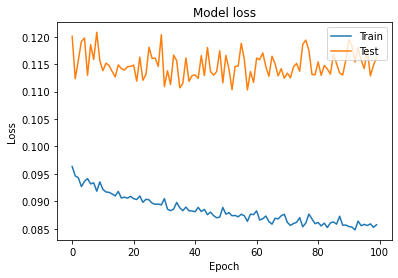

In [116]:
import  matplotlib.pyplot as plt
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])


In [117]:
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
## Classification Report
print(classification_report(y_test, y_pred))

118/118 [==============================] - 0s 528us/step
[[2812   48]
 [  69  821]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2860
           1       0.94      0.92      0.93       890

    accuracy                           0.97      3750
   macro avg       0.96      0.95      0.96      3750
weighted avg       0.97      0.97      0.97      3750



### Early Stopping Callback

In [118]:
## Importing the EarlyStopping call back function
from keras.callbacks import EarlyStopping

In [119]:
earlystopping = EarlyStopping(monitor='val_loss', patience=5)

In [120]:
h_callback = classifier.fit(X_train, y_train, batch_size = 16, epochs = 100, validation_data=(X_test, y_test), callbacks=[earlystopping])

Epoch 1/100
704/704 [==============================] - 1s 786us/step - loss: 0.0856 - accuracy: 0.9740 - val_loss: 0.1154 - val_accuracy: 0.9667
Epoch 2/100
704/704 [==============================] - 1s 767us/step - loss: 0.0857 - accuracy: 0.9740 - val_loss: 0.1146 - val_accuracy: 0.9664
Epoch 3/100
704/704 [==============================] - 1s 769us/step - loss: 0.0851 - accuracy: 0.9737 - val_loss: 0.1156 - val_accuracy: 0.9675
Epoch 4/100
704/704 [==============================] - 1s 757us/step - loss: 0.0859 - accuracy: 0.9737 - val_loss: 0.1158 - val_accuracy: 0.9675
Epoch 5/100
704/704 [==============================] - 1s 774us/step - loss: 0.0848 - accuracy: 0.9737 - val_loss: 0.1176 - val_accuracy: 0.9669
Epoch 6/100
704/704 [==============================] - 1s 777us/step - loss: 0.0848 - accuracy: 0.9748 - val_loss: 0.1174 - val_accuracy: 0.9651
Epoch 7/100
704/704 [==============================] - 1s 779us/step - loss: 0.0859 - accuracy: 0.9752 - val_loss: 0.1160 - val_ac

In [121]:
classifier.evaluate(X_test, y_test)

118/118 [==============================] - 0s 477us/step - loss: 0.1160 - accuracy: 0.9675


[0.11600586771965027, 0.9674666523933411]

In [122]:
y_pred = classifier.predict(X_test)

118/118 [==============================] - 0s 400us/step


In [123]:
y_pred = np.round(y_pred)

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2860
           1       0.94      0.92      0.93       890

    accuracy                           0.97      3750
   macro avg       0.96      0.95      0.95      3750
weighted avg       0.97      0.97      0.97      3750



In [125]:
confusion_matrix(y_pred, y_test)

array([[2810,   72],
       [  50,  818]], dtype=int64)